Connecting Google Colab With Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
img_path = "/content/drive/My Drive/SignLanguage_Data/logo.png"
print(os.path.exists(img_path))


True


Read Data from Google Drive


In [ ]:
from PIL import Image

imagen = Image.open(img_path)

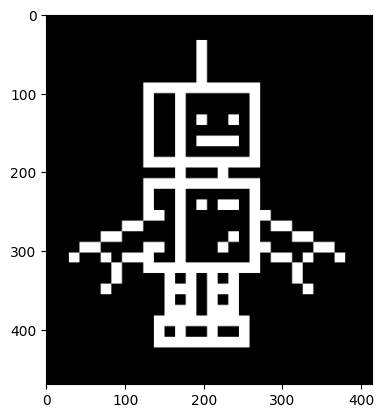

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imagen)

**Transformation to Input image**

**Installing modules**

Before giving data to the model for prediction, we need to preprocess the data to transform the input image so that the image has the right shape and other characteristics like mean and standard deviation. This values should be similar to the ones which where use while training the model making sure the network will produce meaningful answer and the right prediction.

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


**Explanation:**
Resnet and AlexNet uses the same transforms because this transforms are similar to the ones which where used while training the AlexNet model and the AlexNEt model and that is why we will apply the same tranformation to the input image for the right prediction. The resize will transform the input image into 256x256 pixels, transforms.CenterCrop will crop the input image by 224x224 pixels about the center, transforms.ToTensor() will convert the image to pytorch tensor and than transforms.Normalize will normalize the input image by applying the mean and stan dard deviation.


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.220, 0.224, 0.225])
])


In [ ]:

from PIL import Image
import torch


# Load your image and ensure it is in RGB format
img_path = "/content/drive/My Drive/SignLanguage_Data/logo.png"
imagen = Image.open(img_path).convert("RGB")  # Convert to RGB to handle 4-channel images

# Apply the transform
InputImg_t = transform(imagen)
print(InputImg_t.shape)

# Add batch dimension(this is the required size)
Input_Img_bt = torch.unsqueeze(InputImg_t, 0)
print(Input_Img_bt.shape)


torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


**Single Label Classification**

In [ ]:
from torchvision import models
#dir(models) #List all available models, we will use resnet and alexnet

**ResNet**

In [ ]:
resnet = models.resnet101(pretrained=True)
resnet.eval() #evaluation mode for prediction

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Give image to the model
output = resnet(Input_Img_bt)

# Resnet will predict the id of the class, not the name of the class

In [ ]:
alexnet = models.alexnet(pretrained=True)
resnet.eval() #evaluation mode for prediction

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 51.1MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
output = alexnet(Input_Img_bt)

In [ ]:
with open("/content/drive/My Drive/SignLanguage_Data/imagenet1000Classes.txt") as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]



**Find the Predicted Index**

In [ ]:
_, predicted = torch.max(output,1)
percentage = torch.softmax(output,dim=1)[0] * 100
print(ImageNetclasses[predicted[0]], percentage[predicted[0]].item())

781: 'scoreboard', 40.79735565185547


**Multi-Label Classification**

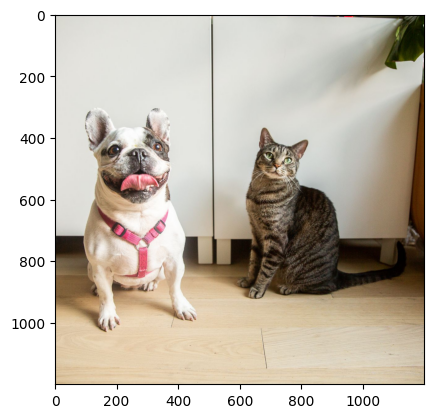

In [ ]:
# Replacing for an image with a cat and dog
img_path = "/content/drive/My Drive/SignLanguage_Data/Dog+and+Cat.jpg"
imagen = Image.open(img_path).convert("RGB")  # Convert to RGB to handle 4-channel images

plt.imshow(imagen)

In [ ]:
from torchvision import transforms
import torch
from torchvision import models

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.220, 0.224, 0.225])
])

# Apply the transform
InputImg_t = transform(imagen)
print(InputImg_t.shape)

# Add batch dimension(this is the required size)
Input_Img_bt = torch.unsqueeze(InputImg_t, 0)
print(Input_Img_bt.shape)

# Using Resnet model
resnet = models.resnet152(pretrained=True)
resnet.eval() #evaluation mode for prediction


output = resnet(Input_Img_bt)

with open("/content/drive/My Drive/SignLanguage_Data/imagenet1000Classes.txt") as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

# for multilabel we will get the top 5 labels from the model output
# we use the sigmoid function since the softmax function gives the probability from 0 to 1
# Sigmoid will give the independant score for each class
_, predictedLabels = torch.sort(output,descending=True)
percentage = torch.sigmoid(output)[0] * 100
# output the top 5 predicted labels, their percentage score,and their class name and id
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:5]]




torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


[("281: 'tabby, tabby cat',", 99.99734497070312),
 ("245: 'French bulldog',", 99.99686431884766),
 ("285: 'Egyptian cat',", 99.99411010742188),
 ("195: 'Boston bull, Boston terrier',", 99.98619842529297),
 ("254: 'pug, pug-dog',", 99.97881317138672)]

**Transfer Learning**